# Ebay-Kleinanzeigen Used Car Listings

DATA:

The dataset used in this project contains 370000 used car listings scraped from Ebay-Kleinanzeigen - a classifieds section of the German eBay website. The dataset was originally scraped and uploaded to Kaggle by user orgesleka, and is no longer available on Kaggle but can be found at https://data.world/data-society/used-cars-data. 

READ ME:

I've removed a lot of the analytical clutter and only left the essentials, comparable to math problems solved without shown work. Unless a change is identified as arbitrary, it was made based on thorough analysis. 

If you're an experienced jupyter notebook user, I would recommend running through cell by cell when you encounter the visualizations, because the visualizations present data which I consequently alter based on observable trends. Anything labelled as a '#GAMECHANGER' in the cleaning segment of the notebook significantly alters the dataset, and will present changes upon running the visualizations again. One particular cell is labelled '#DO NOT RUN MORE THAN ONCE' as well, because it uses percentiles to remove outliers and, therefore, rerunning will redetermine outliers based on the left over data and then chop the dataset down further. 

If you want to get straight to the machine learning price calculation tool at the very end, you can run the notebook all the way through by clicking 'Cell' up in the toolbar and selecting 'Run All'. 

I hope you enjoy my project, it was a great learning experience and I put a lot of time into it. Feedback is welcome. 

Cheers

COLUMNS:

dateCrawled : when this ad was first crawled, all field-values are taken from this date \
name : "name" of the car \
seller : private or dealer \
offerType \
price : the price on the ad to sell the car\
abtest\
vehicleType\
yearOfRegistration : at which year the car was first registered\
gearbox\
powerPS : power of the car in PS\
model\
kilometer : how many kilometers the car has driven\
monthOfRegistration : at which month the car was first registered\
fuelType\
brand\
notRepairedDamage : if the car has a damage which is not repaired yet\
dateCreated : the date for which the ad at ebay was created\
nrOfPictures : number of pictures in the ad\
postalCode\
lastSeenOnline : when the crawler saw this ad last online\

# IMPORTING

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

import operator
import datetime as dt
from itertools import product

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML, display
from ipywidgets import Dropdown

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import xgboost as xgb

In [4]:
autos = pd.read_csv("https://query.data.world/s/4xdnnlquhdodfarwmeexdjrymrxfvq",encoding="Latin-1")
# autos = pd.read_csv("downloads/autos.csv",encoding="Latin-1")

# SETTINGS

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
# this code limits decimal places and avoids scientific notation
pd.set_option("display.max_rows", 400)

# DATA CLEANING

In [6]:
# a look at the data
autos.info()
autos.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
auto_copy = autos.columns
# changing from camalcase to snakecase, as requested in the original Dataquest project
auto_copy = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']
autos.columns = auto_copy

In [8]:
#drop some unnecessary columns
autos.drop('registration_month',axis=1,inplace=True)
autos.drop(['nr_of_pictures','postal_code'],axis=1,inplace=True)

In [9]:
# dealing with missing values

#fillnas
autos['fuel_type'].fillna('unknown',inplace=True)
autos['vehicle_type'].fillna('unknown',inplace=True)
autos["unrepaired_damage"].fillna('unknown',inplace=True)

#dropnas
autos.dropna(subset=['model'],inplace=True)
autos.dropna(subset=['gearbox'],inplace=True)

autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335068 entries, 0 to 371527
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date_crawled       335068 non-null  object
 1   name               335068 non-null  object
 2   seller             335068 non-null  object
 3   offer_type         335068 non-null  object
 4   price              335068 non-null  int64 
 5   abtest             335068 non-null  object
 6   vehicle_type       335068 non-null  object
 7   registration_year  335068 non-null  int64 
 8   gearbox            335068 non-null  object
 9   power_ps           335068 non-null  int64 
 10  model              335068 non-null  object
 11  odometer           335068 non-null  int64 
 12  fuel_type          335068 non-null  object
 13  brand              335068 non-null  object
 14  unrepaired_damage  335068 non-null  object
 15  ad_created         335068 non-null  object
 16  last_seen          3

In [10]:
#specifying 'other' model names
autos['model'] = autos['model'].apply(lambda model: 'other' if model == 'andere' else model)

#sorting out the formatting of the price and odometer columns
autos["price"] = autos["price"].astype(float)
autos.rename({"odometer":"odometer_km"},axis=1,inplace=True)

#sorting out string values with translations and formatting
autos["unrepaired_damage"] = autos["unrepaired_damage"].str.replace("nein","no")
autos["unrepaired_damage"] = autos["unrepaired_damage"].str.replace("ja","yes")
autos[['brand','model','fuel_type','vehicle_type','unrepaired_damage','gearbox']] = autos[['brand','model','fuel_type','vehicle_type','unrepaired_damage','gearbox']].apply(lambda x: x.str.title())
autos['brand'] = autos['brand'].str.replace('Bmw','BMW')
autos['model'] = autos['model'].str.replace('Reihe','Series').str.replace('Er',' Series').str.replace('_',' ').str.replace('Klasse','Class')
autos['brand'] = autos['brand'].str.replace('_','-')
autos['odometer_km'] = autos['odometer_km'].astype(int)
autos['registration_year'] = autos['registration_year'].astype(int)
autos['power_ps'] = autos['power_ps'].astype(int)

gearbox_list = list(autos['gearbox'].unique())
vt_list = list(autos['vehicle_type'].unique())
ft_list = list(autos['fuel_type'].unique())
ft_list2 = ['Petrol', 'Diesel', 'Unknown', 'Lpg', 'Other', 'Hybrid', 'Cng', 'Elektro']
gearbox_list2 = ['Manual', 'Automatic']
vt_list2 = ['Unknown',
 'SUV',
 'Compact',
 'Sedan',
 'Convertible',
 'Van or MPV',
 'Station Wagon',
 'Coupe',
 'Other']

def swapper(list1,list2,column):    
    #replaces column names    
    for x, y in zip(list1, list2): 
        autos[column] = autos[column].str.replace(x,y)

swapper(gearbox_list,gearbox_list2,'gearbox')
swapper(vt_list,vt_list2,'vehicle_type')
swapper(ft_list,ft_list2,'fuel_type')

In [11]:
print(autos.describe())

# removing extreme year outliers, first automobile made on record earliest 1885, data was pulled spring 2016, too early for 2017's models to be selling
autos = autos[autos["registration_year"].between(1885,2016)]

# removing some ridiculous prices, anything below 10 or above 5000000, arbitrary choice
autos = autos[autos["price"].between(10,5000000)]

# deleting a strange jetta outlier found later on in analysis
autos[(autos['model'] == 'jetta') & (autos['unrepaired_damage'] == 'yes')] = autos[(autos['model'] == 'jetta') & (autos['unrepaired_damage'] == 'yes') & (autos['price'] < 900000)]
autos.dropna(subset=['name'],inplace=True)

              price  registration_year   power_ps  odometer_km
count    335,068.00         335,068.00 335,068.00   335,068.00
mean       9,326.68           2,003.78     120.39   126,121.12
std      528,142.94              34.79     187.34    39,070.68
min            0.00           1,000.00       0.00     5,000.00
25%        1,250.00           1,999.00      75.00   125,000.00
50%        3,199.00           2,004.00     110.00   150,000.00
75%        7,500.00           2,008.00     150.00   150,000.00
max   99,999,999.00           9,000.00  20,000.00   150,000.00


# DATA EXPLORATION

In [12]:
def compile_stats(br): 
    # this function and subsequent loop create a dictionary of dataframes containing overall average price, total number of listings, and average price by condition for each model from each vehicle brand, it's loosely based on part of the Dataquest assignment
    select_brand = autos[autos["brand"] == br].copy()
    select_model = select_brand["model"].unique()
    yes_damage = autos["unrepaired_damage"] == "Yes"
    no_damage = autos["unrepaired_damage"] == "No"
    unknown_damage = autos["unrepaired_damage"] == "Unknown"
    avgpr = {}
    for x in select_model: 
        seli = select_brand[select_brand["model"] == x]
        seli2 = seli["price"]
        seli3 = int(len(seli))
        seli4 = (seli2[no_damage].mean(),seli2[yes_damage].mean(),seli2[unknown_damage].mean(),seli2.mean(),seli3)
        avgpr[x] = seli4
    return avgpr

brands = list(autos.brand.value_counts().index)
stats_dict = {}
for brand in brands: 
    stats = compile_stats(brand)
    stats = pd.DataFrame(stats,index=['Undamaged','Damaged','Unknown','Total','Count']).transpose()
    stats.sort_values('Count',ascending=False, inplace=True)
    stats_dict[brand] = stats
    
# this section of code concatenates the dictionary into one dataframe and conducts some minor cleanup, as well as a multiindexing of the columns for organization's sake
vals = [v for k,v in stats_dict.items()]
keys = [k for k,v in stats_dict.items()]

dictas = pd.concat(vals,keys=keys)

dictas.insert(0,column='Listings',value=dictas['Count'])
dictas.drop('Count',axis=1,inplace=True)
dictas.insert(1,column='Avg Price',value=dictas['Total'])
dictas.drop('Total',axis=1,inplace=True)
dictas['Listings'] = dictas['Listings'].astype(int)
dictas.head(400)
dictas = dictas.rename_axis(['Brand','Model'])
# dictas = dictas.sort_values(['Brand','Listings'], ascending=[True,False])

indx = [('Overall','Listings'),('Overall','Avg Price'),('Condition', 'Undamaged'),('Condition', 'Damaged'),('Condition', 'Unknown')]
multi = pd.MultiIndex.from_tuples(indx, names=('Grouping', 'Criteria'))
dictas.columns = multi

# I mainly pursued this concept because I wanted to create a particularily multi-indexed dataframe
dictas

Grouping                          Overall           Condition            \
Criteria                         Listings Avg Price Undamaged   Damaged   
Brand         Model                                                       
Volkswagen    Golf                  26330  5,121.31  5,972.64  1,918.67   
              Polo                  11466  2,841.17  3,327.39  1,927.30   
              Passat                 9321  5,094.23  5,895.14  2,290.15   
              Transporter            4960 10,741.19 11,912.55  4,780.42   
              Touran                 3106  7,833.29  8,381.06  5,245.32   
              Lupo                   2279  1,476.80  1,633.68    805.14   
              Caddy                  1446  7,093.63  7,946.81  3,323.91   
              Sharan                 1312  6,572.24  7,343.30  4,151.85   
              Tiguan                  881 17,509.88 17,701.45 12,055.05   
              Bora                    807  2,500.81  2,643.84  1,511.37   
              Beetle                  791  7,591.25  7,951.47  4,384.21   
              Touareg                 694 15,906.71 16,859.95 10,092.84   
              Fox                     676  2,881.93  3,069.06  1,845.74   
              Other                   662  5,898.74  6,778.00  2,679.02   
              Scirocco                589 11,667.85 11,986.95  8,249.13   
              Eos                     514 11,625.37 11,747.45  8,373.25   
              Kaefer                  345  8,465.08 10,134.51  3,075.88   
              Up                      337  8,003.75  8,194.76  5,789.53   
              Jetta                   314  8,221.59  5,699.30 57,482.17   
              Phaeton                 215 10,684.15 11,164.19  6,716.09   
              Cc                      179 17,625.04 18,114.63 11,819.50   
              Amarok                   37 23,972.49 24,719.59 10,200.00   
BMW           3 Series              18870  6,130.83  6,959.58  2,357.62   
              5 Series               8021  8,488.82  9,288.60  4,193.11   
              1 Series               3659 11,426.93 11,799.61  6,768.87   
              X Series               2197 18,295.60 18,905.38 11,684.24   
              7 Series               1046  9,441.72 10,921.66  4,117.99   
              Z Series                858 15,538.45 16,040.46  7,112.44   
              M Series                327 31,282.93 32,820.56 19,202.00   
              Other                   310 25,399.94 29,868.04  6,947.83   
              6 Series                234 22,152.12 23,516.19 19,967.18   
              I3                        8  7,297.25  9,855.80  1,500.00   
Opel          Corsa                 10970  2,025.91  2,428.56    971.87   
              Astra                  9655  3,362.27  3,816.08  1,283.68   
              Vectra                 3775  1,790.99  2,145.78    906.15   
              Zafira                 2665  3,903.91  4,304.40  2,147.59   
              Omega                  1236  1,176.52  1,437.52    720.00   
              Other                  1087  8,007.44  9,674.10  1,968.96   
              Meriva                  947  4,802.65  5,041.97  2,721.27   
              Tigra                   690  2,831.90  3,418.43    949.20   
              Insignia                662 12,803.15 13,049.08  7,510.46   
              Signum                  456  3,929.80  4,340.31  2,189.32   
              Agila                   381  1,981.09  2,305.04    782.63   
              Combo                   353  2,731.32  2,929.23  2,088.44   
              Vivaro                  305  8,139.32  8,719.50  4,902.93   
              Kadett                  274  2,983.14  3,480.88  1,688.91   
              Calibra                 165  2,413.70  2,912.06  1,133.72   
              Antara                  103  9,273.83 10,153.94  4,157.14   
Mercedes-Benz C Class                8226  7,000.38  7,774.17  3,313.45   
              E Class                7119  8,301.89  9,440.22  3,572.98   
              A Class    

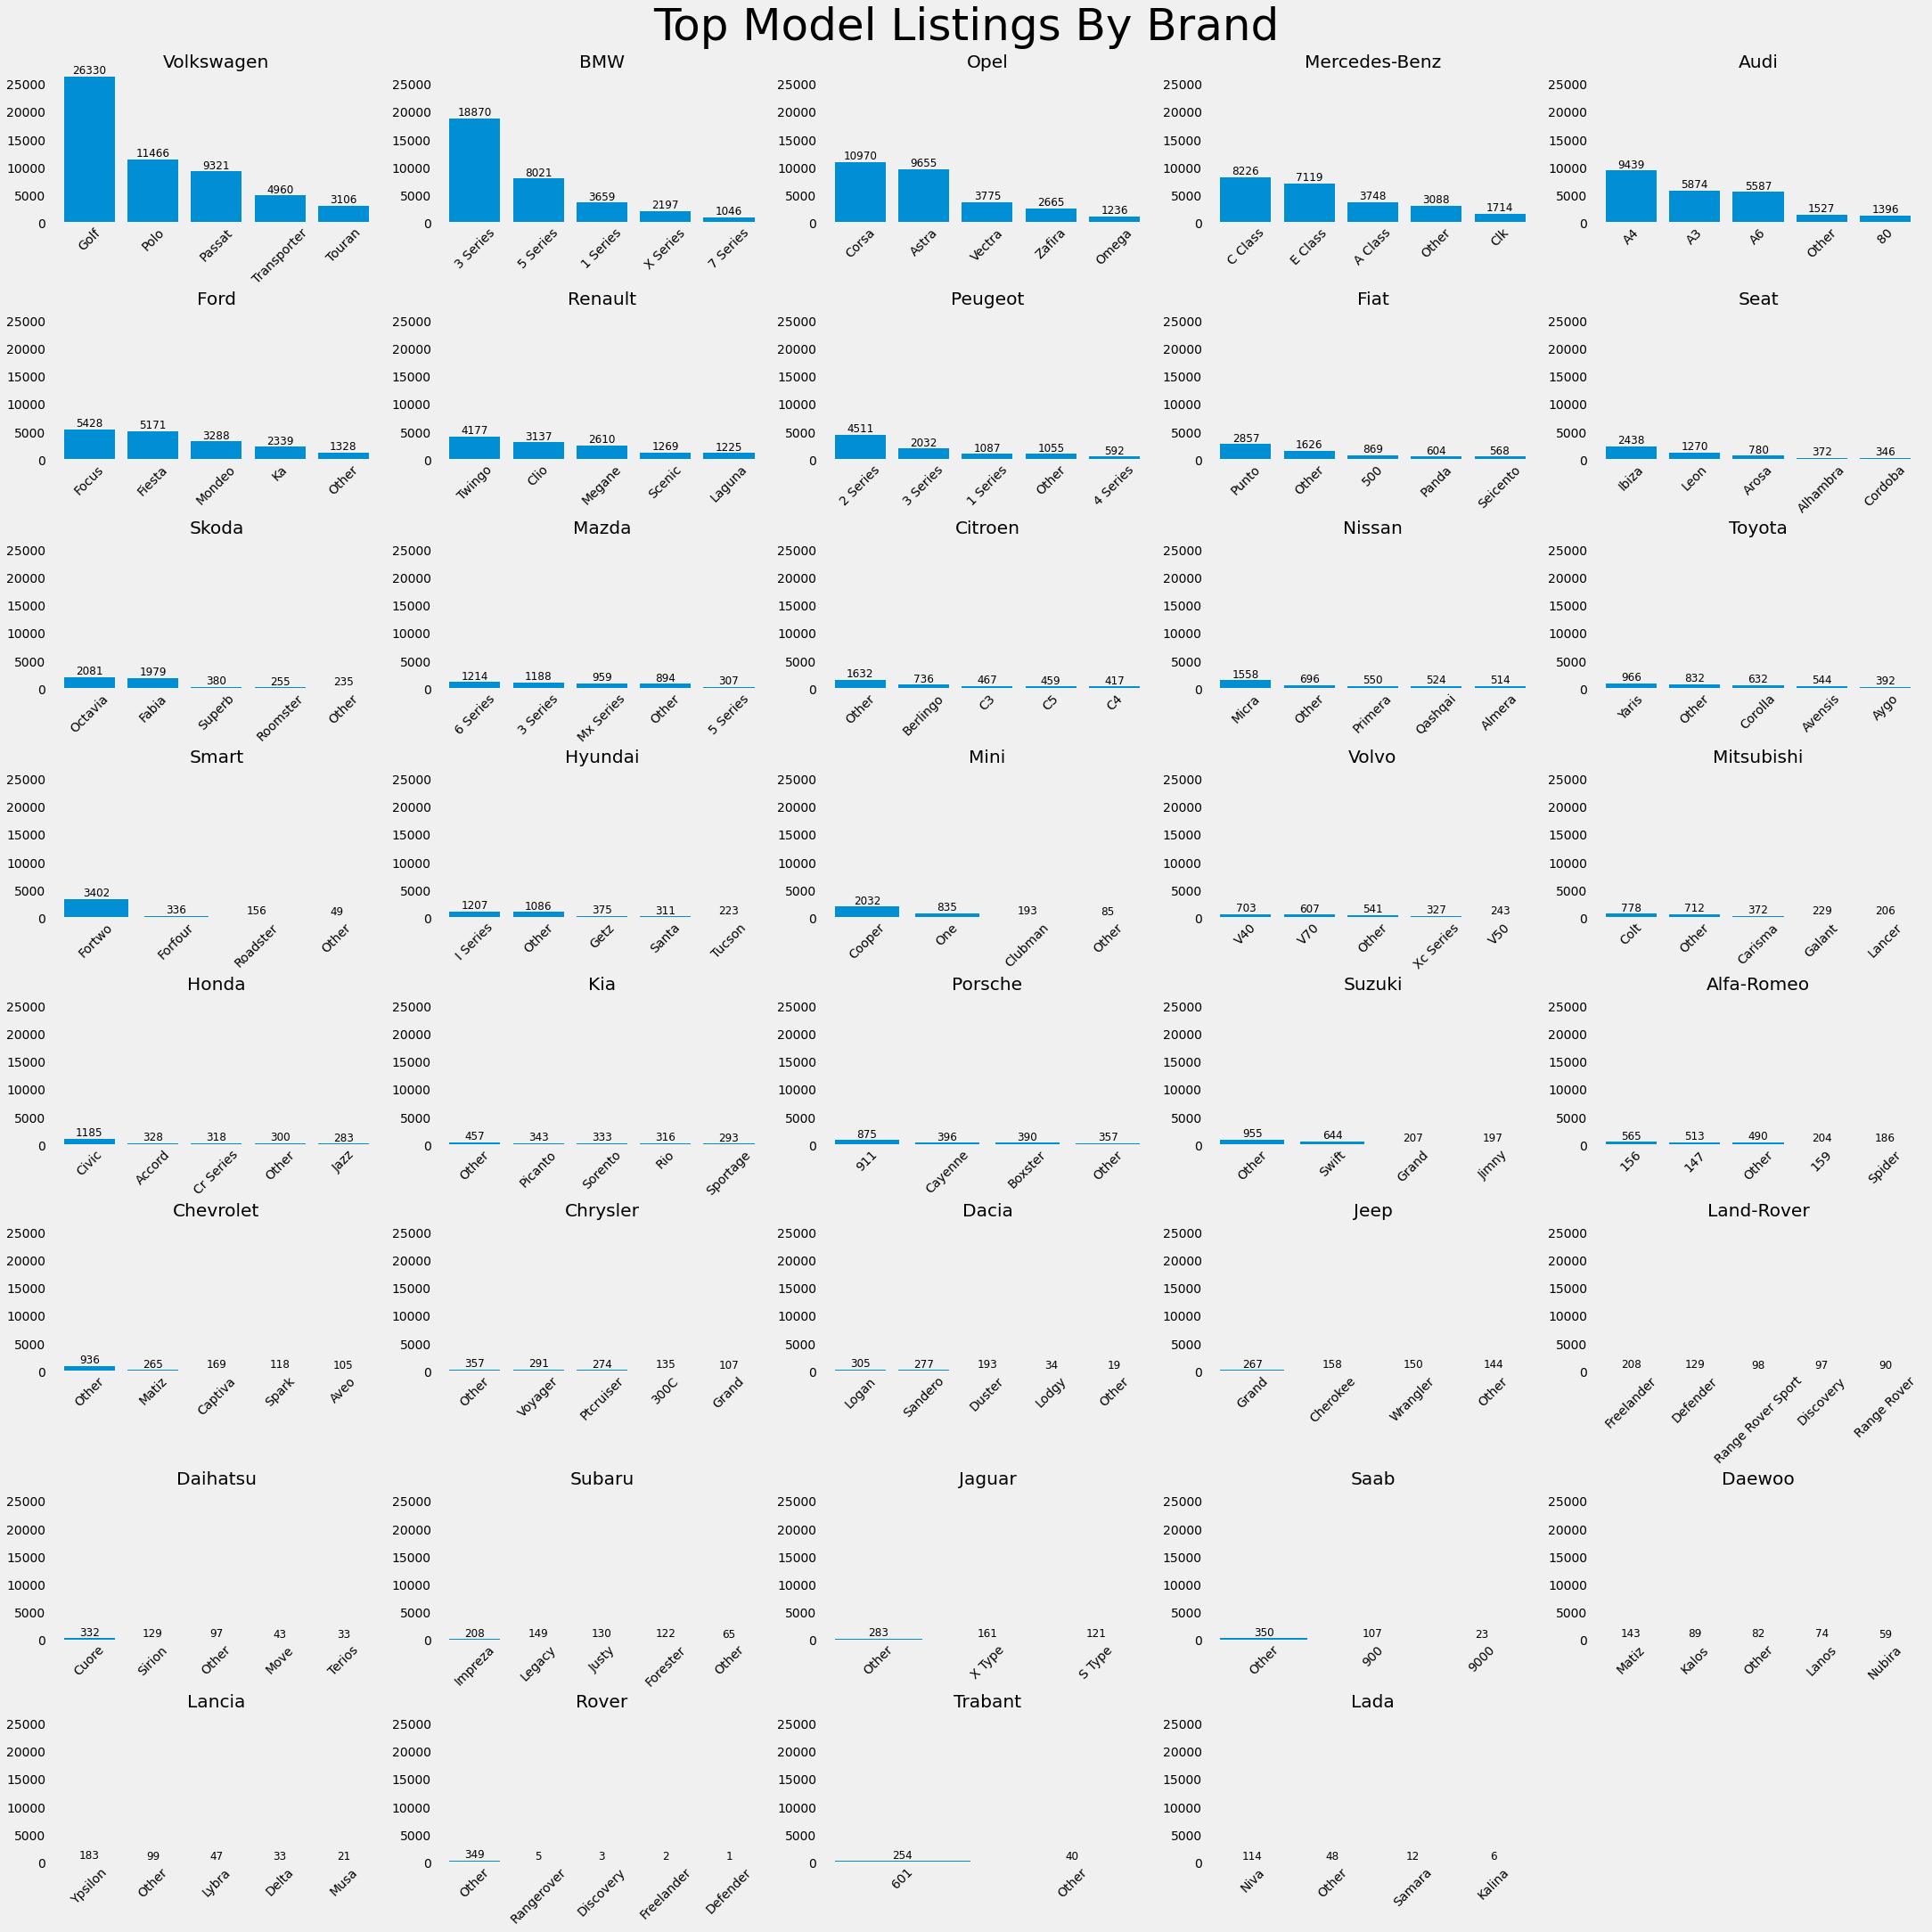

In [13]:
# this plot provides a glimpse at the number of listings for the top five (if available) models for each brand, plotted in order by number of total brand listings
plt.style.use('fivethirtyeight')

fig, axs = plt.subplots(8,5,figsize=(30,30),constrained_layout=True)
coord = (0,1,2,3,4,5,6,7)
coord2 = (0,1,2,3,4)
coords = product(coord, coord2)

for brand, i in zip(dictas.index.unique('Brand'),coords): 
    df = dictas.loc[brand]
    models = df.index[:5]
    axs[i].bar(models,df['Overall']['Listings'][:5])
    axs[i].set_title('{}'.format(brand))
    axs[i].set_ylim(0,27000)
    axs[i].bar_label(axs[i].containers[0],fontsize=12)
    axs[i].grid(False)
    axs[i].set_xticks(models)
    axs[i].set_xticklabels(models, rotation = 45)
    
fig.delaxes(axs[7,4])    
fig.suptitle('Top Model Listings By Brand',fontsize=50)    
    
plt.show()   

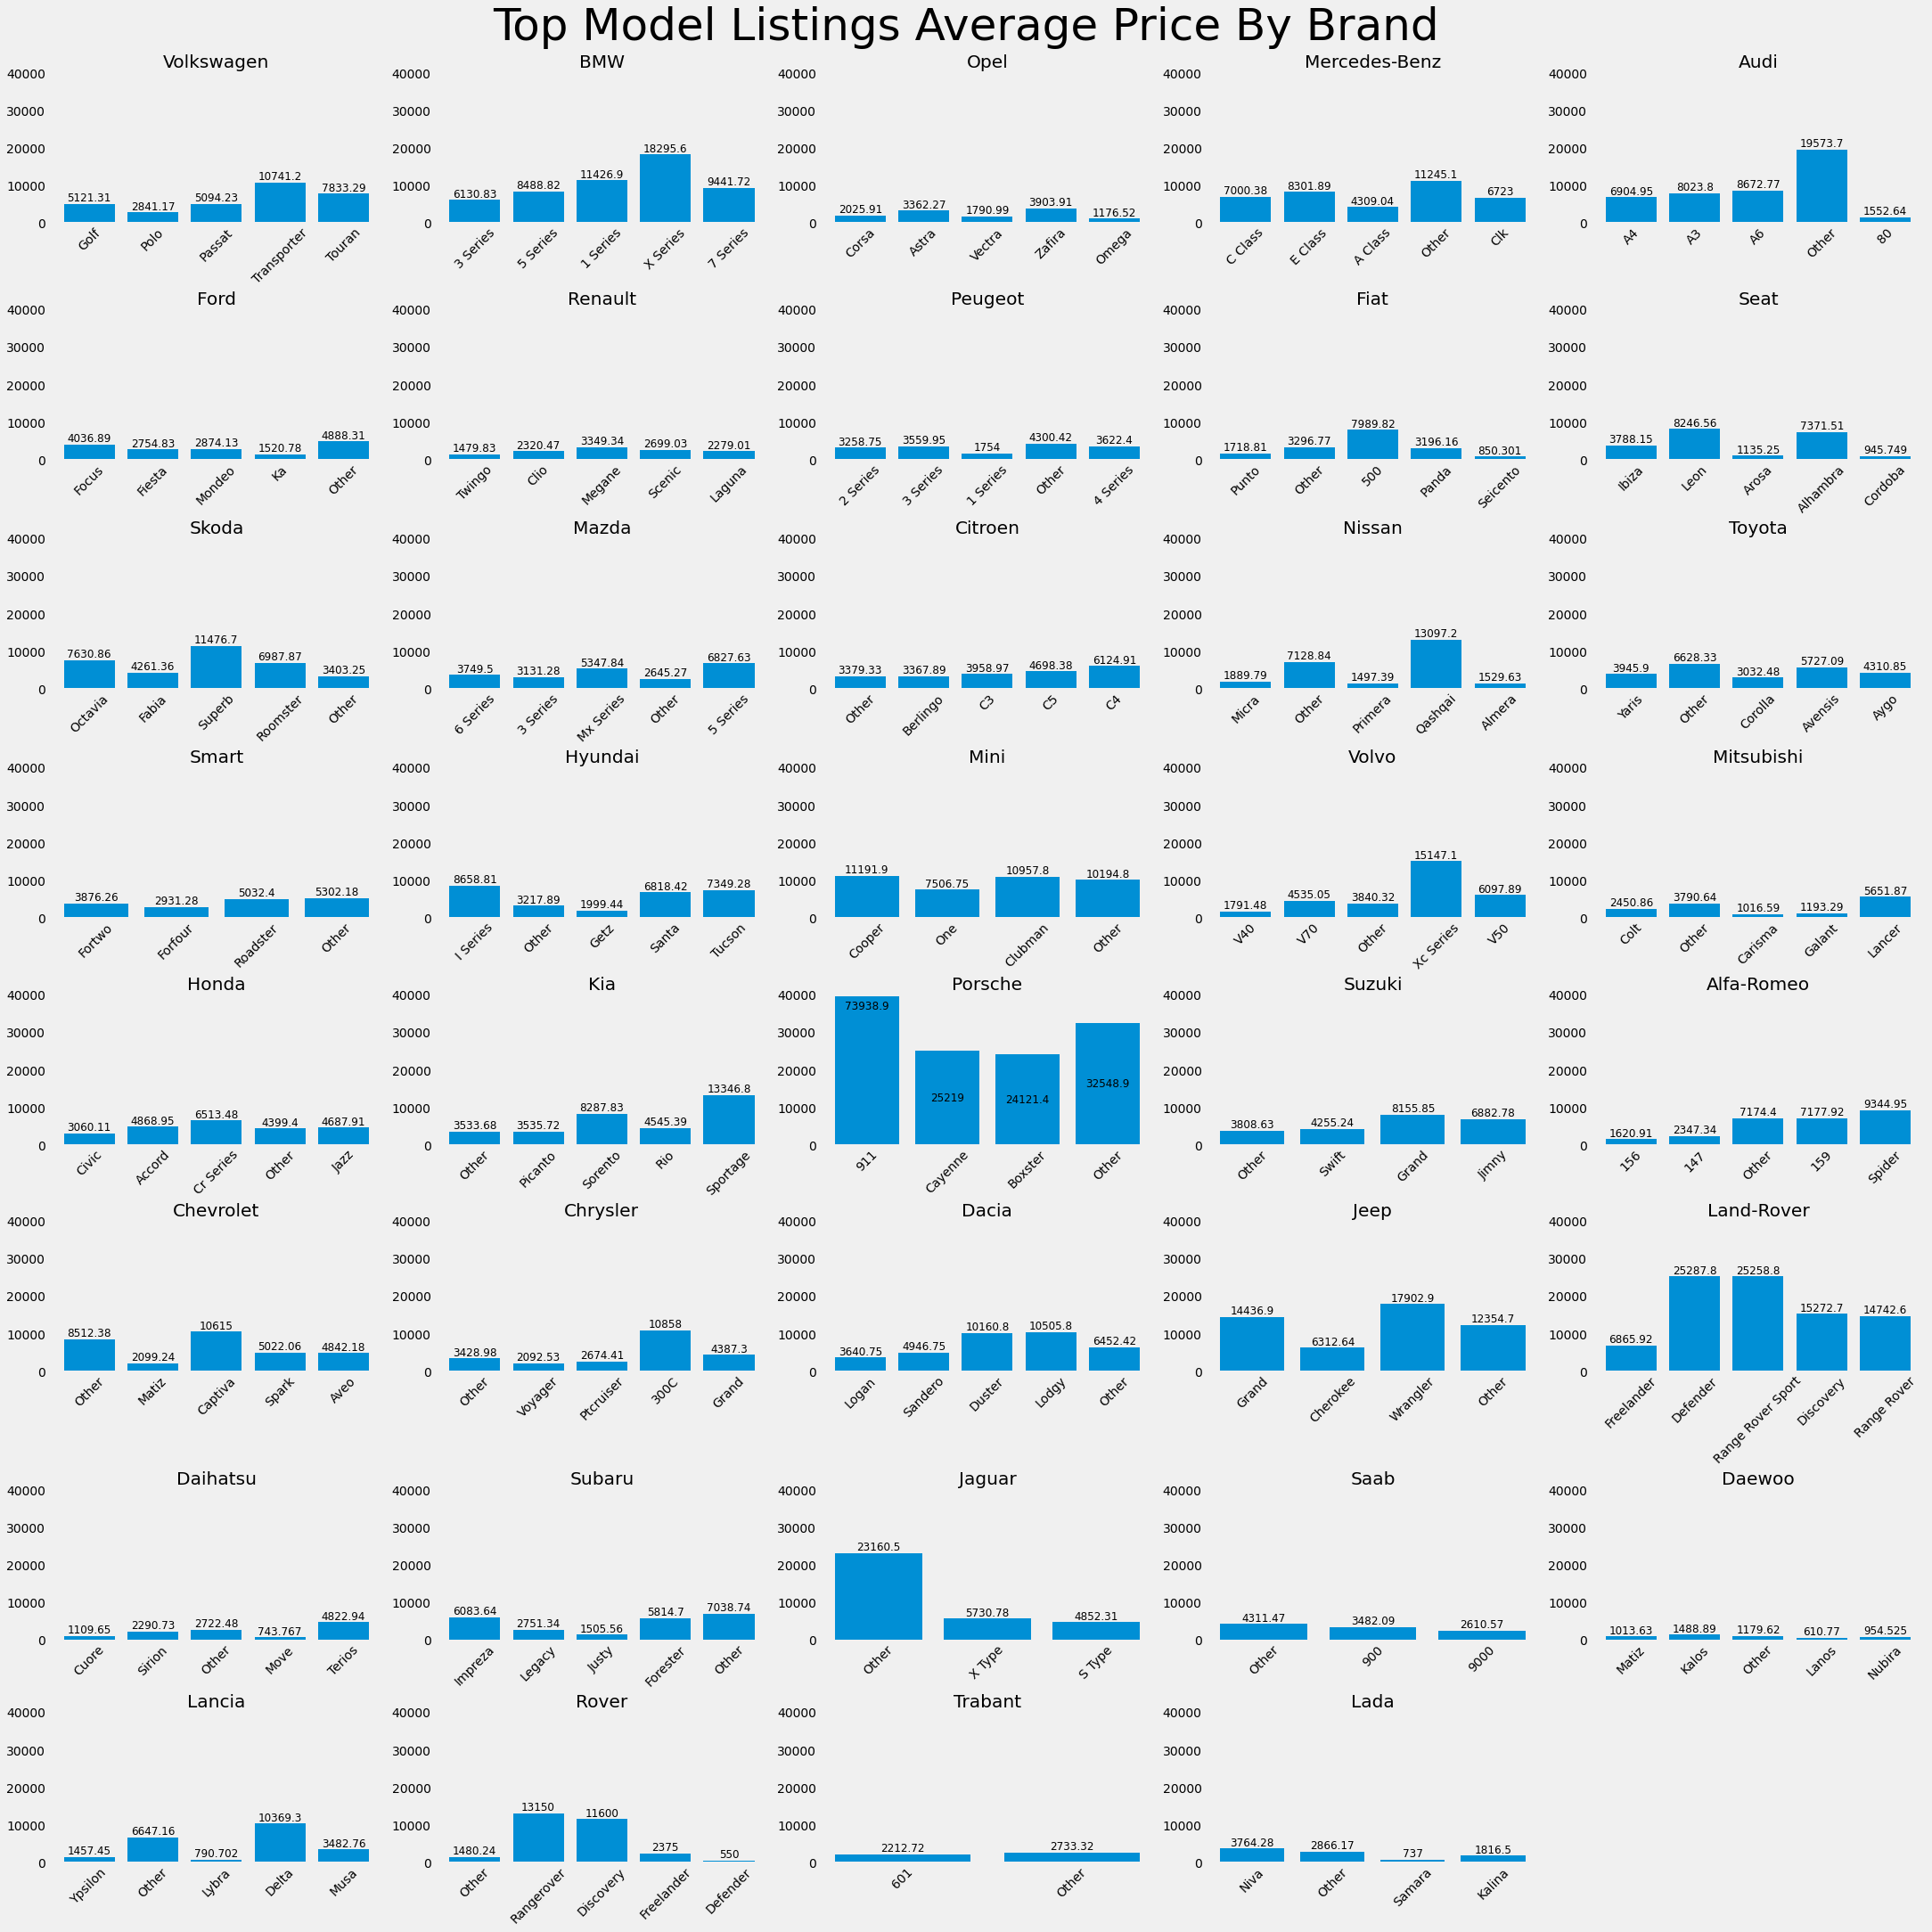

In [14]:
# this plot provides a glimpse at the average price for the top five (if available) models for each brand, plotted in order by number of total brand listings
plt.style.use('fivethirtyeight')

fig, axs = plt.subplots(8,5,figsize=(30,30),constrained_layout=True)
coord = (0,1,2,3,4,5,6,7)
coord2 = (0,1,2,3,4)
coords = product(coord, coord2)

for brand, i in zip(dictas.index.unique('Brand'),coords): 
    df = dictas.loc[brand]
    models = df.index[:5]
    axs[i].bar(models,df['Overall']['Avg Price'][:5])
    axs[i].set_title('{}'.format(brand))
    axs[i].set_ylim(0,40000)
    if i == (4,2): 
        axs[i].bar_label(axs[i].containers[0],fontsize=12, label_type='center') 
    else:
        axs[i].bar_label(axs[i].containers[0],fontsize=12, label_type='edge')
    axs[i].grid(False)
    axs[i].set_xticks(models)
    axs[i].set_xticklabels(models, rotation = 45)

fig.delaxes(axs[7,4]) 
fig.suptitle('Top Model Listings Average Price By Brand',fontsize=50)    
    
plt.show()   

In [15]:
# custom color palette
colurs2 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928','darkred']
pal = sns.color_palette(colurs2)

# this dropdown plotter enables viewing of any model with year on the x-axis, price on the y-axis and the odometer count acting as a third categorical axis, models above 100000 are cutaway to maintain a well-scaled window for viewing. I deal with price outliers later on in the notebook. 
def plotter(model):
    
    plt.figure(figsize=(50,50))

    order = ['No','Yes','Unknown']
    
    data = autos[(autos['brand'] == brand2W.value) & (autos['model'] == model) & (autos['price'] < 100000) & (autos['registration_year'] > 1940)]
    
    cmap_count = len(data['odometer_km'].unique())

    sns.relplot(data=data,x='registration_year',y='price',style='unrepaired_damage',hue='odometer_km', style_order=order, height=10,palette=sns.color_palette(colurs2[:cmap_count]))

    plt.title('{} {}'.format(brand2W.value, model),fontsize=75) 
    plt.xlabel('Year')
    plt.ylabel('Price')

    plt.show()  
    
def selectioner(brand): 
    model2W.options = autos[autos['brand'] == brand2W.value]['model'].unique()
        
brand2W = widgets.Dropdown(options=autos['brand'].unique())
model2W = widgets.Dropdown(options=autos[autos['brand'] == brand2W.value]['model'].unique())
uno = widgets.interactive(plotter, model=model2W)
dos = widgets.interactive(selectioner, brand = brand2W)
display(dos)
display(uno)   

interactive(children=(Dropdown(description='brand', options=('Volkswagen', 'Jeep', 'Skoda', 'BMW', 'Peugeot', …

interactive(children=(Dropdown(description='model', options=('Golf', 'Passat', 'Scirocco', 'Transporter', 'Oth…

I suggest taking a second and going through various models in various brands before carrying on with the notebook. Upon careful analysis you may notice a trend in the year 2016 across multiple popular models. There are a number of listings that cost too little and have too many kilometers on the odometer. The abundance of these listings suggested to me that something was off and so I filter the dataset accordingly to remove these strange outliers. I believe this is an exceptional example of using exploratory, interactive, visual data analysis in order to clean a dataset for explanatory analysis and/or modelling. 

In [16]:
#GAMECHANGER

# it seems unlikely that this many cars would have been driven 500km everyday since released and then listed so cheap, so I chose this filter
anom1_bool = (autos['registration_year'] == 2016) & (autos['odometer_km'] >= 125000)
autos = autos[~anom1_bool].copy()

In [17]:
def plotter2(brand, var):
    
    # this widget produces a boxen plot for all models within all brands. There's also the option of selecting all brands and viewing an array of brands instead of models. The purpose of this tool is to visualize where the outliers lie. 
    
    plt.figure(figsize=(50,50))
    
    if brand == 'All':
        sns.catplot(x=var,col='brand',data=autos,kind='boxen',height=5,col_wrap=6, aspect=.7, col_order=autos.brand.value_counts(ascending=False).index, sharex=False)

    else: 
        data = autos[(autos['brand'] == brand)]   
        sns.catplot(x=var,col='model',data=data,kind='boxen',height=5,col_wrap=6, aspect=.7, col_order=data.model.value_counts(ascending=False).index, sharex=False)
        
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()   

opts = list(autos['brand'].value_counts(ascending=False).index)
opts.append('All')
    
brand5W = widgets.Dropdown(options=opts)
var5W = widgets.Dropdown(options=['price','registration_year','power_ps'])
uno = widgets.interactive(plotter2, brand=brand5W, var = var5W)
display(uno)   

interactive(children=(Dropdown(description='brand', options=('Volkswagen', 'BMW', 'Opel', 'Mercedes-Benz', 'Au…

In [18]:
def plotter3(brand, var):
    
    # this is more or less the same deal as above but plotted on a shared x-axis. Each view has its pros and cons, so I went with both. 
    
    plt.figure(figsize=(30,30))
    
    if brand == 'All':
        sns.boxenplot(x=var,y='brand',data=autos,orient='h')

    else: 
        data = autos[(autos['brand'] == brand)]   
        sns.boxenplot(x=var,y='model',data=data, orient='h')
    
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.show()   

opts = list(autos['brand'].value_counts(ascending=False).index)
opts.append('All')
    
brand5W = widgets.Dropdown(options=opts)
var5W = widgets.Dropdown(options=['price','registration_year','power_ps'])
uno = widgets.interactive(plotter3, brand=brand5W, var = var5W)
display(uno)   

interactive(children=(Dropdown(description='brand', options=('Volkswagen', 'BMW', 'Opel', 'Mercedes-Benz', 'Au…

In [19]:
def outliers2func(brand,model,col):
    
    # this tool produces two dataframes. The first dataframe contains all outliers existing for the selected criteria. The second dataframe contains listings remaining when outliers are removed, as a means of cross-referencing and determining the outlier removal's effectiveness. 
    
    modelW.options = autos[autos['brand'] == brandW.value]['model'].unique()
    
    df = autos[(autos['brand'] == brandW.value) & (autos['model'] == modelW.value)]
    length1 = len(df)
    if col == 'power_ps':
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1    
        lr = Q1 - 5 * IQR
        ur = Q3 + 5 * IQR
    elif col == 'price': 
        lr, ur = df[col].quantile([0.0001, 0.9999])
    else: 
        lr, ur = df[col].quantile([0.0003, 0.9997])
    outliers = df[(df[col] < lr) | (df[col] > ur)].sort_values(col,ascending=False)
    df = df[df[col].between(lr,ur)].sort_values(col,ascending=False)
    length2 = len(outliers)

    print('Criteria Length: {}, Outliers: {}'.format(length1,length2))
    print('Low Range: {}, High Range: {}'.format(round(lr),round(ur)))
    print('OUTLIERS')
    display(outliers)
    print('NON OUTLIERS')
    display(df)        

opts = list(autos['brand'].value_counts(ascending=False).index)    
brandW = widgets.Dropdown(options=opts)
opts2 = list(autos[autos['brand'] == brandW.value]['model'].value_counts(ascending=False).index)
modelW = widgets.Dropdown(options=opts2)
varW = widgets.Dropdown(options=['registration_year','price','power_ps'])
dos = widgets.interactive(outliers2func, model = modelW, x=False, y=False, brand = brandW, col = varW)
display(dos)

interactive(children=(Dropdown(description='brand', options=('Volkswagen', 'BMW', 'Opel', 'Mercedes-Benz', 'Au…

In [20]:
#GAMECHANGER

#DO NOT RUN MORE THAN ONCE

# this bit of code strips the dataframe appart into a nested dictionary and removes all outliers with the methodology used in the widget tool above

models_dict = {}
for brand in autos['brand'].unique():
    brand_df = autos[autos['brand'] == brand]
    for model in brand_df['model'].unique():
        model_df = brand_df[brand_df['model'] == model]
           
        lr1, ur1 = model_df['registration_year'].quantile([0.0003, 0.9997])
        model_df = model_df[model_df['registration_year'].between(lr1,ur1)]
                                
        lr2, ur2 = model_df['price'].quantile([0.0001, 0.9999])
        model_df = model_df[model_df['price'].between(lr2,ur2)]        
        
        Q1, Q3 = model_df['power_ps'].quantile([0.25, 0.75])
        IQR = Q3 - Q1    
        lr3 = Q1 - 5 * IQR
        ur3 = Q3 + 5 * IQR
        model_df = model_df[model_df['power_ps'].between(lr3,ur3)]
        
        lr4, ur4 = model_df['price'].quantile([0.0001, 0.9999])
        model_df = model_df[model_df['price'].between(lr4,ur4)]  
        
        models_dict[(brand + model)] = model_df
        
autos = pd.concat(models_dict,ignore_index=True)           

In [21]:
#GAMECHANGER

# this bit of code determines the average horsepower for each model by year, identifies and then replaces the numerous horsepower entries with a value of 0 (there were thousands) with the average horsepower for that model/year.

years_dict = {}

for brand in autos['brand'].unique():
    brand_df = autos[autos['brand'] == brand]
    for model in brand_df['model'].unique():
        model_df = brand_df[brand_df['model'] == model].copy()
        for year in model_df['registration_year'].unique(): 
            year_df = model_df[model_df['registration_year'] == year].copy()
            year_df['Avg'] = year_df['power_ps'].mean()
            years_dict[(brand + model + year.astype(str))] = year_df

autos = pd.concat(years_dict,ignore_index=True)

autos['power_ps'] = autos['power_ps'].mask(autos['power_ps'] < 20,autos['Avg'].round().astype(int))

# FEATURE SELECTION

In [22]:
# these proved to be the columns most strongly correlated with price based on correlation and heatmap analysis
machine_time = autos[['brand','model','odometer_km','registration_year','gearbox', 'vehicle_type', 'fuel_type', 'power_ps','unrepaired_damage','price']].copy()

In [23]:
# arbitrary cutoff removes eight Porsche 911s which were significantly negatively affecting algoithm effectiveness as scored below
price_bool = (machine_time['price'] > 500000)
machine_time = machine_time[~price_bool]

In [24]:
# converting non-numeric values to numeric

le_brand = LabelEncoder()
le_model = LabelEncoder()
le_urd = LabelEncoder()
le_gearbox = LabelEncoder()
le_vt = LabelEncoder()
le_ft = LabelEncoder()

le_list = [le_model, le_brand, le_urd, le_gearbox, le_vt, le_ft]
mt_list = [col for col in machine_time[['model','brand','unrepaired_damage', 'gearbox', 'vehicle_type', 'fuel_type']]]

for col, le in zip(mt_list,le_list): 
    le.fit(machine_time[col])
    machine_time[col] = le.transform(machine_time[col])

# MODELING

In [25]:
X = machine_time.drop('price',axis=1)
y= machine_time['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

3186.1315211533233


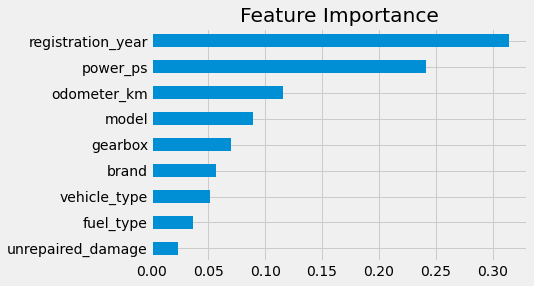

In [28]:
# here's the model. It was a close race between XGB Regressor and Random Forest Regressor. Performance was similar but the XGB Regressor is much faster, and I liked its proportions of feature importance better. The parameters were deterined with trial and error approach.

xgr = xgb.XGBRegressor(n_estimators=100,learning_rate=0.05, subsample=0.9,gamma=1,max_depth=6)
xgr.fit(X_train,y_train)
pred = xgr.predict(X_test)
mse = mean_squared_error(pred,y_test)
rmse = np.sqrt(mse)
print(rmse)

feature_important = xgr.feature_importances_
values = list(feature_important)
data = pd.DataFrame(data=values, index=X_train.columns,columns=['score']).sort_values(by = 'score')
ax=data.plot(kind='barh',title='Feature Importance',legend=None)
plt.show()

In [29]:
# this K-Fold cross validation determines the consistency of the model. The close proximity of the test and train RMSEs conveys that the model is not overfit, and the low standard deviation between folds conveys that RMSEs were similar. 

kf = KFold(n_splits=7,shuffle=True,random_state=12)
mses = cross_validate(xgr,X,y,scoring='neg_mean_squared_error',cv=kf,return_train_score=True)

mses_test = mses['test_score']
rmses_test = np.sqrt(np.abs(mses_test))
std_rmses_test = np.std(rmses_test)
avg_rmses_test = np.mean(rmses_test)
print('Test Average RMSE: {}, Test Standard Deviation: {}'.format(avg_rmses_test, std_rmses_test))

mses_train = mses['train_score']
rmses_train = np.sqrt(np.abs(mses_train))
std_rmses_train = np.std(rmses_train)
avg_rmses_train = np.mean(rmses_train)
print('Train Average RMSE: {}, Train Standard Deviation: {}'.format(avg_rmses_train, std_rmses_train))

Test Average RMSE: 3307.0210825782265, Test Standard Deviation: 258.42980943362954
Train Average RMSE: 2933.6759683294, Train Standard Deviation: 24.976699796703134


# THE CALCULATOR

Here's where it all comes together. In the dropdown below, you can enter particulars of your choosing and hit 'Show Price' in order to display a calculated price suggestion based on the hundreds of thousands of rows of data used to train the model. You'll notice that upon selecting the top fields suggestions will appear in order to get you on the right track in fields with a lot of ambiguity/variability, like year, horsepower, fuel type etc. If a selection exists in the dataset one or more times, its average price will be displayed as well for comparison. 

Try out some combinations and see what you get, and thanks for checking out my project. 

In [30]:
def calculator(): 
    roger = [brand4W.value,model4W.value,odm4W.value,year4W.value,gb4W.value,vt4W.value,ft4W.value,pp4W.value,urd4W.value]
    roger1 = pd.DataFrame([roger],columns=list(machine_time.columns.drop('price')))
    for col, le in zip(mt_list,le_list): 
        roger1[col] = le.transform(roger1[col])
    prediction = xgr.predict(roger1)
    print('Recommendation: {} €'.format(round(float(prediction))))
    commondf=pd.merge(machine_time,roger1,on=list(roger1.columns))
    if len(commondf) > 0:
        print('Listed Average: {} €, Based on {} Listings'.format(round(commondf['price'].mean()), len(commondf)))
                          
def selections(brand,model,year,odm,gearbox,vehicle_type,fuel_type,power,urd): 
    model4W.options = sorted(autos[autos['brand'] == brand4W.value]['model'].unique())
    year4W.options = sorted(autos['registration_year'].unique())
    odm4W.options = sorted(autos['odometer_km'].unique())
    gb4W.options=sorted(autos['gearbox'].unique())
    vt4W.options=sorted(autos['vehicle_type'].unique())
    ft4W.options=sorted(autos['fuel_type'].unique())
    pp4W.options=sorted(autos['power_ps'].unique())
    hps = list(autos[(autos['brand'] == brand4W.value) & (autos['model'] == model4W.value) & (autos['registration_year'] == year4W.value)]['power_ps'].unique())
    gears = list(autos[(autos['brand'] == brand4W.value) & (autos['model'] == model4W.value) & (autos['registration_year'] == year4W.value)]['gearbox'].unique())
    fts = list(autos[(autos['brand'] == brand4W.value) & (autos['model'] == model4W.value) & (autos['registration_year'] == year4W.value)]['fuel_type'].unique())
    vts = list(autos[(autos['brand'] == brand4W.value) & (autos['model'] == model4W.value) & (autos['registration_year'] == year4W.value)]['vehicle_type'].unique())
    if len(gears) > 0: 
        print('Transmissions Listed: {}'.format(gears))
    if len(vts) > 0:     
        print('Vehicle Types Listed: {}'.format(vts))
    if len(fts) > 0:
        print('Fuel Types Listed: {}'.format(fts))
    if len(hps) > 0: 
        print('Horsepowers Listed: {}'.format(hps))
    urd4W.options=autos['unrepaired_damage'].unique()
    
brand4W = widgets.Dropdown(options=sorted(autos['brand'].unique()),description='Brand')
model4W = widgets.Dropdown(options=autos[autos['brand'] == brand4W.value]['model'].unique(),description='Model')
odm4W = widgets.Dropdown(options=sorted(autos['odometer_km'].unique()),description='Odometer')
year4W = widgets.Dropdown(options=sorted(autos['registration_year'].unique()),description='Year')
gb4W = widgets.Dropdown(options=sorted(autos['gearbox'].unique()),description='Transmission')
vt4W = widgets.Dropdown(options=sorted(autos['vehicle_type'].unique()),description='Vehicle Type')
ft4W = widgets.Dropdown(options=sorted(autos['fuel_type'].unique()),description='Fuel Type')
pp4W = widgets.Dropdown(options=sorted(autos['power_ps'].unique()),description='Horsepower')
urd4W = widgets.Dropdown(options=autos['unrepaired_damage'].unique(),description='Damaged')

optioner = widgets.interactive(selectioner, model = model4W, brand = brand4W, year = year4W, odm = odm4W, gearbox = gb4W, vehicle_type = vt4W, fuel_type = ft4W, power = pp4W, urd = urd4W)
buttoner = interact_manual.options(manual_name="Show Price")
buttoner(calculator)
display(optioner)
display(buttoner)

interactive(children=(Button(description='Show Price', style=ButtonStyle()), Output()), _dom_classes=('widget-…

interactive(children=(Dropdown(description='Brand', options=('Alfa-Romeo', 'Audi', 'BMW', 'Chevrolet', 'Chrysl…